# Projeção de dados alguns dados não sei ainda

## Inicializando variáveis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
import statsmodels.api as sm
from multidata import *

In [2]:
def errordiff(result_a, result_b):
    errors = []
    columns_a, columns_b = result_a.columns.values, result_b.columns.values
    size_a, size_b = len(columns_a), len(columns_b)
    for i in range(0, size_a, 2):
        if columns_a[i] in columns_b:
            error_a = sm.tools.eval_measures.mse(result_a[columns_a[i]], result_a[columns_a[i] + ' projetado'], axis=0)
            error_b = sm.tools.eval_measures.mse(result_b[columns_a[i]], result_b[columns_a[i] + ' projetado'], axis=0)
            errors.append([columns_a[i], error_a, error_b, error_a/error_b])
    return errors

In [3]:
def periodic_proj(columns, title='esqueceu o titulo', period=5):
    df = pd.DataFrame()
    for column in columns:
        df = pd.concat([df, self[column[0]][column[1]]], axis=1)
    n_projections = int(period/columns)
    for p in len(1, n_projections + 1):
        training_size = p*period

In [4]:
%run ../Limpezas/limpeza_análise_energética.ipynb

In [5]:
df = MultiData(dict_analise_energetica)

## Análise e projeção de produção de energia primária

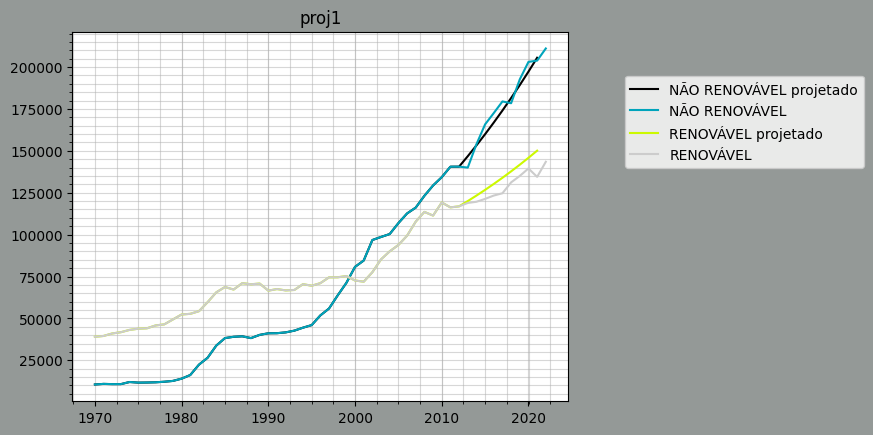

In [9]:
proj1 = df.Projection.VAR(2012, [(0, 'NÃO RENOVÁVEL'),
                               (0, 'RENOVÁVEL')],
                               'Geração de energia renovável vs não renovável')
df.add_dataframe(proj1, 'proj1')
df.Plotting.autoplot('proj1')

##### O modelo não teve uma previsão tão boa, apesar de seguir bem a tendência central da variação

In [ ]:
proj2 = df.projection_var(2012, [(0, 'NÃO RENOVÁVEL'),
                               (0, 'PETRÓLEO'),
                               (0, 'GÁS NATURAL'),
                               (0, 'CARVÃO VAPOR'),
                               (0, 'RENOVÁVEL'),
                               ],
                               'Geração de energia por fonte')

##### Esse modelo se saiu aparentemente melhor nas projeções que estávamos tentando anteriormente, mas para ter certeza, comparar utilizando a métrica MSE (Mean Squared Error)

In [ ]:
errors = errordiff(proj1, proj2)
print(*errors)

##### Realmente, a segunda projeção, com mais variáveis, se saiu muito melhor para prever os resultados da geração de energia não renovável e renovável. Na projeção de energia não renovável, se saiu 32 vezes mais preciso de acordo com a métrica utilizada, e para energia renovável, mais de 7 vezes mais preciso, agora está em um nível suficiente para fazermos uma projeção futura, mas vale notar que o desempenho não foi muito bom para o gás natural

##### Projeção futura

In [ ]:
pass

## Análise e projeção de consumo interno por setor

In [ ]:
print(df[6].columns.values)

In [ ]:
proj3 = df.projection_var(2009, [(6, 'RESIDENCIAL'),
                               (6, 'COMERCIAL'),],
                               'Projeção de consumo residencial e comercial')

##### A projeção seguiu proximamente os valores esperados para ambos, mas talvez possa ficar ainda melhor com a adição de outras variáveis

In [ ]:
proj4 = df.projection_var(2009, [(6, 'RESIDENCIAL'),
                               (6, 'COMERCIAL'),
                               (6, 'PÚBLICO'),
                               (6, 'AGROPECUÁRIO')],
                               'Projeção de consumo residencial e comercial')

##### A projeção de consumo residencial foi aparentemente bem melhor, mas o de consumo comercial aparentemente ficou pior. Vamos comparar exatamente as diferenças:

In [ ]:
errors2 = errordiff(proj3, proj4)
print(*errors2)

##### Como esperado, a precisão no consumo residencial foi mais de 7 vezes melhor, mas o comercial foi o contrário, com a precisão mais de 2 vezes pior. Mas vamos assumir que isso é suficientemente preciso e seguir com a projeção futura

In [ ]:
df.projection_var(2028,
                  [(6, 'RESIDENCIAL'),
                   (6, 'COMERCIAL'),
                   (6, 'PÚBLICO'),
                   (6, 'AGROPECUÁRIO')],
                   'Projeção de consumo residencial e comercial')

## Análise e projeção da oferta interna de energia

In [ ]:
df[2].columns.values

In [ ]:
proj4 = df.projection_var(2009, [(2, 'EÓLICA'),
                               (2, 'SOLAR')],
                               'Projeção de consumo residencial e comercial')

##### Ambas as projeções estão fora por muito, pois o crescimento das fontes renováveis foi algo repentino. Talvez com algumas outras variáveis seja possível elaborar um modelo melhor.

In [ ]:
proj4 = df.projection_var(2009, [(2, 'EÓLICA'),
                               (2, 'SOLAR'),
                               (2, 'LENHA E CARVÃO VEGETAL'),
                               (2, 'HIDRÁULICA E ELETRICIDADE')],
                               'Projeção de consumo residencial e comercial')

##### Infelizmente, o modelo continua apresentando péssimos resultados, então não vale a pena tentar utilizá-lo para tentar uma projeção futura

In [ ]:
proj4 = df.projection_var(2009, [(2, 'PETRÓLEO, GÁS NATURAL E DERIVADOS'),
                               (2, 'LENHA E CARVÃO VEGETAL')],
                               'Projeção de consumo residencial e comercial')